In [131]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Descargar información de TripAdvisor
El siguiente código itera sobre todas las páginas de tripAdvisor que contienen los reviews acerca de Paseo de la reforma y extrae los campos que nos interesan que son: El número de estrellas, el título del comentario y el comentario

In [85]:
results = pd.DataFrame()
for page in range(460):
    url = 'https://www.tripadvisor.com/Attraction_Review-g150800-d152798'+'-or{}'.format(page*10)+ '.html'
    page = requests.get(url)
    soup = BeautifulSoup(page.content,'html.parser')
    title = [a.find('span').contents[0] for a in soup.find_all('div',class_='quote')]
    stars = [a.find('div',class_ = 'ui_column is-9').contents[0] for a in soup.find_all('div',class_ = 'review-container')]
    comment = [a.contents[0] for a in soup.find_all('p',class_ = 'partial_entry')]
    a = pd.DataFrame({'title': title,'comment':comment,'stars':stars})
    results = results.append(a)

Limpiar la base, extraer el rating porque en el paso anterior se extrae en un formato extraño

In [126]:
results = ( results
           .reset_index()
           .assign(rating = lambda df: df['stars'].map(lambda x: str(x)).str.extract('([0-9]+)'))
           .drop(['index','stars'],axis=1)
          )

C:\Users\Scastaneda01\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


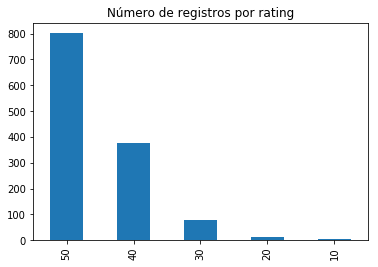

In [135]:
results['rating'].value_counts().plot(kind='bar',title='Número de registros por rating');

In [136]:
results.to_csv('reviews.csv')